# install OpenNMT


In [14]:
!git clone -b legacy https://github.com/OpenNMT/OpenNMT-py

Cloning into 'OpenNMT-py'...
remote: Enumerating objects: 17381, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 17381 (delta 187), reused 290 (delta 161), pack-reused 17041
Receiving objects: 100% (17381/17381), 273.64 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (12495/12495), done.


In [1]:
!pip install OpenNMT-py

     |████████████████████████████████| 215kB 8.6MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 645kB 27.6MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 14.3MB 197kB/s 
     |████████████████████████████████| 748.8MB 22kB/s 
     |████████████████████████████████| 1.2MB 46.7MB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchtext 0.9.1
    Uninstalling torchtext-0.9.1:
      Successfully uninstalled torchtext-0.9.1
  Found exis

# user BPE for better results

In [15]:
!python OpenNMT-py/tools/learn_bpe.py -i train.en -o OpenNMT-py/data/src.code -s 10000

In [16]:
!python OpenNMT-py/tools/learn_bpe.py -i train.fa -o OpenNMT-py/data/tgt.code -s 10000

In [17]:
!python OpenNMT-py/tools/apply_bpe.py -c OpenNMT-py/data/src.code -i train.en -o OpenNMT-py/data/src-train-bpe.txt

In [18]:
!python OpenNMT-py/tools/apply_bpe.py -c OpenNMT-py/data/src.code -i valid.en -o OpenNMT-py/data/src-val-bpe.txt

In [19]:
!python OpenNMT-py/tools/apply_bpe.py -c OpenNMT-py/data/src.code -i test.en -o OpenNMT-py/data/src-test-bpe.txt

In [20]:
!python OpenNMT-py/tools/apply_bpe.py -c OpenNMT-py/data/tgt.code -i train.fa -o OpenNMT-py/data/tgt-train-bpe.txt

In [21]:
!python OpenNMT-py/tools/apply_bpe.py -c OpenNMT-py/data/tgt.code -i valid.fa -o OpenNMT-py/data/tgt-val-bpe.txt

In [22]:
!python OpenNMT-py/tools/apply_bpe.py -c OpenNMT-py/data/tgt.code -i test.fa -o OpenNMT-py/data/tgt-test-bpe.txt

## preprocessing data

In [23]:
!python OpenNMT-py/preprocess.py -train_src OpenNMT-py/data/src-train-bpe.txt -train_tgt OpenNMT-py/data/tgt-train-bpe.txt -valid_src OpenNMT-py/data/src-val-bpe.txt -valid_tgt OpenNMT-py/data/tgt-val-bpe.txt -save_data OpenNMT-py/data/demo

[2021-06-18 15:49:58,972 INFO] Extracting features...
[2021-06-18 15:49:58,972 INFO]  * number of source features: 0.
[2021-06-18 15:49:58,972 INFO]  * number of target features: 0.
[2021-06-18 15:49:58,972 INFO] Building `Fields` object...
[2021-06-18 15:49:58,973 INFO] Building & saving training data...
[2021-06-18 15:49:59,044 INFO] Building shard 0.
[2021-06-18 15:50:00,142 INFO]  * saving 0th train data shard to OpenNMT-py/data/demo.train.0.pt.
[2021-06-18 15:50:01,212 INFO]  * tgt vocab size: 9987.
[2021-06-18 15:50:01,223 INFO]  * src vocab size: 9806.
[2021-06-18 15:50:01,267 INFO] Building & saving validation data...
[2021-06-18 15:50:01,300 INFO] Building shard 0.
[2021-06-18 15:50:01,308 INFO]  * saving 0th valid data shard to OpenNMT-py/data/demo.valid.0.pt.


In [24]:
# !python OpenNMT-py/train.py -data OpenNMT-py/data/demo -save_model OpenNMT-py/results/models/demo-model -gpu_ranks 0 --train_steps 1000 --valid_steps 1000 --save_checkpoint_steps 100 --report_every 100

In [28]:
!python OpenNMT-py/train.py -data OpenNMT-py/data/demo -save_model OpenNMT-py/results/models/demo-model --train_steps 3000 --valid_steps 100 --save_checkpoint_steps 100 --report_every 100 -layers 6 -rnn_size 512 -word_vec_size 512 -transformer_ff 2048 -heads 8 -encoder_type transformer -decoder_type transformer -position_encoding  -max_generator_batches 2 -dropout 0.1 -batch_size 2048 -batch_type tokens -normalization tokens -accum_count 2 -optim adam -adam_beta2 0.998 -decay_method noam -warmup_steps 8000 -learning_rate 2 -max_grad_norm 0 -param_init 0 -param_init_glorot -label_smoothing 0.1  -world_size 1 -gpu_rank 0

[2021-06-18 15:51:28,193 INFO]  * src vocab size = 9806
[2021-06-18 15:51:28,193 INFO]  * tgt vocab size = 9987
[2021-06-18 15:51:28,193 INFO] Building model...
[2021-06-18 15:51:32,140 INFO] NMTModel(
  (encoder): TransformerEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(9806, 512, padding_idx=1)
        )
        (pe): PositionalEncoding(
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (transformer): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linear_keys): Linear(in_features=512, out_features=512, bias=True)
          (linear_values): Linear(in_features=512, out_features=512, bias=True)
          (linear_query): Linear(in_features=512, out_features=512, bias=True)
          (softmax): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (final_linear): Linear(in_features=512, out_feature

# translate

In [29]:
import os

In [30]:
models = ["OpenNMT-py/results/models/" + model for model in os.listdir('OpenNMT-py/results/models/')]
models.sort(key=lambda model: int(model.split("_")[-1].split('.')[0]))

In [31]:
os.mkdir('OpenNMT-py/results/translations')

In [32]:
for model in models:
    os.system(f'python OpenNMT-py/translate.py -model {model} -src OpenNMT-py/data/src-val-bpe.txt -output OpenNMT-py/results/translations/{model.split("/")[-1].split(".")[0]}.txt -replace_unk  -beam_size 1 --gpu 0')

In [33]:
translations = ['OpenNMT-py/results/translations/' + i for i in os.listdir('OpenNMT-py/results/translations/')]
translations.sort(key=lambda model: int(model.split("_")[-1].split('.')[0]))

In [34]:
for translation in translations:
    os.system(f"sed -i 's/@@ //g'  {translation}")

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def bleu(refrence_file, translated_file):
    with open(refrence_file, 'r') as fp:
        refrence = [(fp.read()).split()]
    with open(translated_file, 'r') as fp:
        trans = (fp.read()).split()
    return sentence_bleu(refrence, trans)

In [ ]:
bleu_scores = []

In [ ]:
bleu_scores = bleu_scores[:-1]

In [ ]:
for translation in translations:
    score = bleu('valid.fa', translation)
    bleu_scores.append(score)

In [ ]:
import matplotlib.pyplot as plt
def plot_bleu_scores(bleu_scores, epochs, step):
    plt.figure(figsize = (15, 5))
    x = [i for i in range(1, epochs, step)]
    plt.plot(x, bleu_scores, label='BLEU Score', marker='o', linestyle='--', markeredgecolor='black')
    plt.grid()
    plt.xlabel('epochs')
    plt.ylabel('BLEU Score')
    plt.title('evolution of BLEU score throughout training')
    plt.legend()

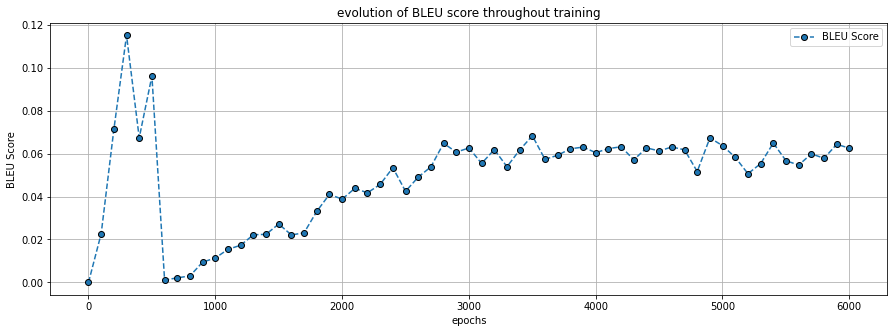

In [ ]:
plot_bleu_scores(bleu_scores, 6100, 100)

In [ ]:
import numpy as np
np.save("blue_scores.npy", np.array(bleu_scores))

In [ ]:
temp_scores = np.load("1-3000-every-100.npy")

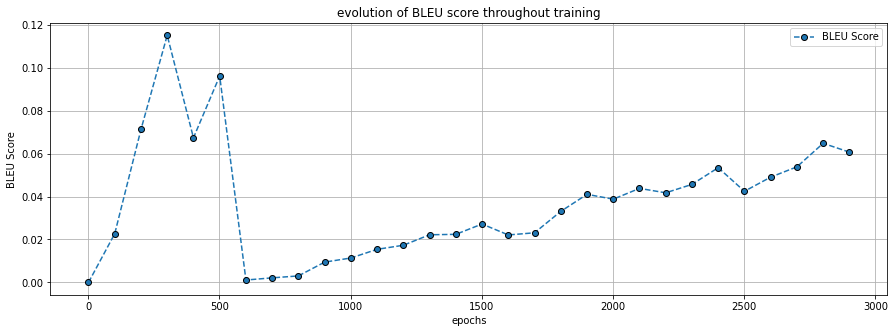

In [ ]:
plot_bleu_scores(temp_scores, 3000, 100)